In [1]:
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
from src.utils.analyzer import get_logs_pickle,get_means_logs, get_means_limited, get_mean_std_from_logs

In [ ]:
log_path = r'logs\TL_EffN0_256_05_11_2020_22_10'
k = 3

In [ ]:
logs333 = {}
for i in range(k):
    with open(f"{log_path}/{i}.json") as f:
        logs333[i] = json.load(f)
with open(f"{log_path}/config.json") as f:
    config_file = json.load(f)

In [ ]:
logs3=[]
logs33=[]

In [3]:
def get_mean(logs, stat="val_auc"):
    result = np.array([sum(x) for x in zip(logs[0][stat],logs[1][stat],logs[2][stat],logs[3][stat],logs[4][stat])])/5
    return result

def get_mean3(logs, stat="val_auc"):
    result = np.array([sum(x) for x in zip(logs[0][stat],logs[1][stat],logs[2][stat])])/3
    return result

In [ ]:
stat = "auc"

In [ ]:
val_recall = get_mean3(logs333,"val_"+stat)
recall = get_mean3(logs333,stat)
plt.plot(val_recall,'r')
plt.plot(recall)
print(np.max(val_recall))

In [ ]:
val_recall = get_mean3(logs3,"val_"+stat)
recall = get_mean3(logs3,stat)
plt.plot(val_recall,'r')
plt.plot(recall)
print(np.max(val_recall))

In [ ]:
val_recall = get_mean3(logs33,"val_"+stat)
recall = get_mean3(logs33,stat)
plt.plot(val_recall,'r')
plt.plot(recall)
print(np.max(val_recall))

In [ ]:
logs = []
log_path = r'logs\TL_EffN0_256_04_11_2020_16_21'
k = 5

In [5]:
log_path = r'logs\FINAL_6_EffN0_3e-06-0.0001_256_20_11_2020_12_01'
logs = get_logs_pickle(log_path)
means = get_means_logs(logs)
means

{'loss': array([1.94048599, 1.78776109, 1.54144673, 1.28564088, 1.13620261,
        1.03972687, 0.93749617, 0.85367543, 0.81427892, 0.76769024,
        0.74842652, 0.73155282, 0.72285342, 0.71064484, 0.70350715,
        0.7057752 , 0.6945564 , 0.698252  , 0.7070725 , 0.71365227,
        0.71170463, 0.73179958, 0.72565393, 0.72425165, 0.72192115,
        0.73107233, 0.72224657, 0.70733909, 0.68748079, 0.69530918,
        0.69416722, 0.6857753 , 0.67580867, 0.68274713, 0.68575966,
        0.70248757, 0.69598055, 0.70491932, 0.69744368, 0.71263995,
        0.71826617, 0.70915367, 0.70176729, 0.70409103, 0.69023923,
        0.68629742, 0.67574257, 0.66721008, 0.66796005, 0.67249354,
        0.67865616, 0.66857413, 0.6851657 , 0.70349876, 0.70729393,
        0.70284112, 0.69898285, 0.69037161, 0.69311571, 0.67619558,
        0.67782982, 0.66695058, 0.66174195, 0.65901107, 0.66213657,
        0.66771497, 0.66925156, 0.6661403 , 0.68410067, 0.67662352,
        0.67922264, 0.69759492, 0.697300

In [2]:
log_path2 = r'logs\FINAL15fold_4_EffN0_3e-06-0.0001_256_21_11_2020_14_47'
logs2 = get_logs_pickle(log_path2)
means2 = get_means_limited(logs2)

In [9]:
for x in logs2["val_auc"]:
    print(np.max(x))

0.8056818246841431
0.8036333918571472
0.7992933988571167
0.8024890422821045
0.8076841235160828
0.8112184405326843
0.794858992099762
0.8194063901901245
0.8121760487556458
0.7992907762527466
0.7952782511711121
0.8146148920059204
0.8096923828125
0.813890278339386
0.7881783246994019


In [23]:
def get_mean_std_from_logs(logs:pd.DataFrame, metric="val_auc", get_best_func = np.max):
    mean = logs[metric].apply(get_best_func).mean()
    std = logs[metric].apply(get_best_func).std()
    return mean, std

In [10]:
get_mean_std_from_logs(logs)

(0.6973192691802979, 0.014971002116343779)

In [37]:
log_path3 = r'logs\FINAL15fold_3_EffN0_3e-06-0.0001_256_21_11_2020_18_19'
logs3 = get_logs_pickle(log_path3)
means3 = get_means_limited(logs3)

0.7940072576204936

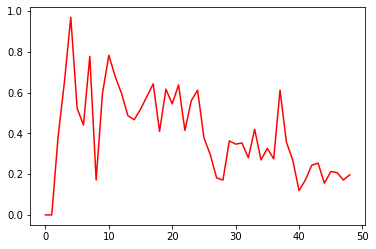

In [6]:
i=1
max = 100
plt.ylim()
#plt.plot(means['auc'])
#plt.plot(logs2['auc'][i])
plt.plot(logs2['val_recall'][i],'r')
#plt.plot(logs2['auc'][i],'g')
#plt.plot(logs3['val_auc'][i])
#plt.plot(logs3['auc'][i])
np.max(means2['val_auc'])
#means3["val_auc"][40]

In [45]:
suma = 0
k = 3
for i in logs['val_auc']:
    suma += i.max()
    print(i.max())

print("\n",suma/k)

0.807248055934906
0.8314998745918274
0.8063847422599792

 0.8150442242622375


In [ ]:
for x in range(100):
    print(f"{x}:\t{1*0.9**x}")

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils.analyzer import get_lr_epoch_wise_CLR
y = means['auc']
x = np.apply_along_axis(get_lr_epoch_wise_CLR,0,range(len(y)))
pol = []
for a in y:
    print(a)

0.5256241162618002
0.6141500870386759
0.6695038874944051
0.6838040153185526
0.6920573115348816
0.7086786230405172
0.7094493309656779
0.7171500523885092
0.7331905762354533
0.7290195822715759
0.7411351005236307
0.7486547231674194
0.7406449913978577
0.7566738128662109
0.7557833592096964
0.7646073500315348
0.7717920343081156
0.7690348823865255
0.7660557230313619
0.7661362091700236
0.7603534460067749
0.76223224401474
0.7726527651151022
0.7521009643872579
0.7511682510375977
0.7649233341217041
0.7668189605077108
0.7804679075876871
0.7768086989720663
0.7902181347211202
0.8053989013036092
0.8092866937319437
0.8039068182309469
0.7964139183362325
0.8023422161738077
0.8027099768320719
0.7968699137369791
0.7844560345013937
0.7988221247990926
0.7905489404996237
0.786743958791097
0.8032900293668112
0.8098820249239603
0.8139522274335226
0.8305231730143229
0.8380846381187439
0.8484954635302225
0.8509589632352194
0.8556955456733704
0.8529413541158041
0.8578352133433024
0.84514981508255
0.844080587228139

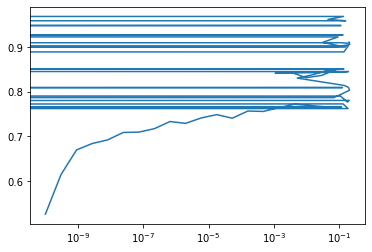

In [70]:
plt.xscale('log')
plt.plot(x,y)

In [11]:
import pickle
import matplotlib.pyplot as plt
log_path = r'logs\LR_range_test_5_EffN0_0.0001-0.1_256_18_11_2020_12_15\logs.pickle'
with open(log_path,'rb') as f:
    logs_lr3 = pickle.load(f)

0.8545224070549011

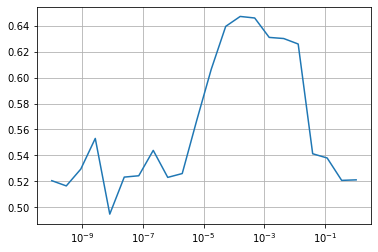

In [12]:
plt.xscale('log')
plt.grid(True)
#plt.plot(logs_lr0['lr'],logs_lr0['auc'])
#plt.plot(logs_lr1['lr'],logs_lr1['auc'])
#plt.plot(logs_lr2['lr'],logs_lr2['auc'])
plt.plot(logs_lr3['lr'],logs_lr3['auc'])
# plt.plot(logs_lr4['lr'],logs_lr4['auc'])
# plt.plot(logs_lr5['lr'],logs_lr5['auc'])
# plt.plot(logs_lr6['lr'],logs_lr6['auc'])
# plt.plot(logs_lr7['lr'],logs_lr7['auc'])
#plt.plot(logs['lr'],logs['val_auc'])
#plt.plot(logs['lr'],logs2['auc'])
#plt.plot(logs['lr'],logs2['val_auc'])
np.max(logs_lr0['val_auc'])

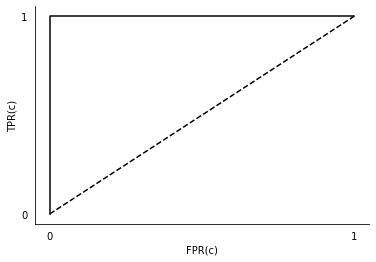

In [98]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['ytick.left'] = False
mpl.rcParams['xtick.bottom'] = False
plt.xlabel("FPR(c)")
plt.ylabel("TPR(c)")
plt.plot([0,0,1],[0,1,1],'black')
plt.plot([0,1],[0,1],"--k")
plt.xticks([0,1])
plt.yticks([0,1])
plt.savefig("idealny.pdf")

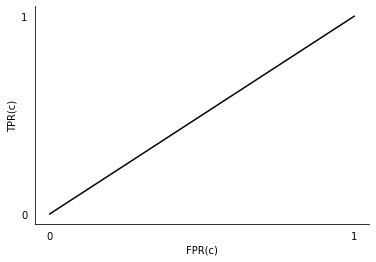

In [88]:
plt.xlabel("FPR(c)")
plt.ylabel("TPR(c)")
plt.xticks([0,1])
plt.yticks([0,1])
plt.plot([0,1],[0,1],'black')
plt.savefig("losowy.pdf")

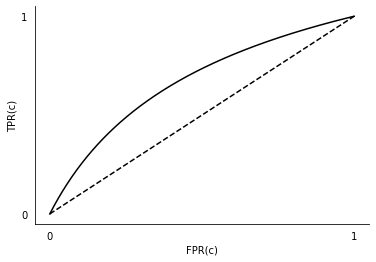

In [124]:
from scipy.interpolate import splrep, splev

plt.xlabel("FPR(c)")
plt.ylabel("TPR(c)")
list_y = [0,0,0,0,0,0,.1,.1,.2,.2,.3,.3,.4,.4,.5,.5,.6,.6,.7,1,1,1,1,1,1]
list_x = [0,0,0,0,0,0,.3,.3,.4,.4,.5,.6,.6,.7,.7,.8,.8,.9,.9,1,1,1,1,1,1]

x = np.linspace(0,1,1000)
y = np.log2(np.log2(np.log2(x+1)+1)+1)

#plt.plot(list_x,list_y,'black')
bspl = splrep(list_x,list_y,s=10)
list_y = splev(list_x,bspl)
plt.xticks([0,1])
plt.yticks([0,1])
plt.plot(x,y,"black")
plt.plot([0,1],[0,1],"--k")
plt.savefig("poprawny.pdf")